<a href="https://colab.research.google.com/github/neurobit-ai/eyeForm/blob/main/data_to_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
assert files.upload()

Saving eyeForm.db.xlsx to eyeForm.db.xlsx


In [2]:
import pandas as pd
df = pd.read_excel('eyeForm.db.xlsx', sheet_name='三總', skiprows=2)[['性別', '實歲', '右眼軸長', '左眼軸長', '眼鏡', '散瞳劑', '角膜塑型片']].dropna(subset=['性別', '實歲', '右眼軸長', '左眼軸長'])
df

,性別,實歲,右眼軸長,左眼軸長,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,25.46,25.13,NaN,0.0005,NaN
1,男,7歲2月,25.48,25.20,NaN,NaN,NaN
2,男,7歲4月,25.56,25.26,NaN,NaN,NaN
3,女,7歲7月,23.66,23.50,NaN,0.0003,NaN
5,女,8歲3月,24.0,23.77,NaN,0.0005,NaN
...,...,...,...,...,...,...,...
3979,女,3歲10個月,21.48,21.51,NaN,NaN,NaN
3980,男,3歲5個月,22.62,22.73,NaN,NaN,NaN
3981,男,3歲6個月,22.63,22.68,NaN,NaN,NaN
3982,男,5歲6個月,22.52,22.74,NaN,NaN,NaN


In [3]:
od = df.drop(columns='左眼軸長')
os = df.drop(columns='右眼軸長')
od.columns = ['性別', '實歲', '軸長', '眼鏡', '散瞳劑', '角膜塑型片']
os.columns = ['性別', '實歲', '軸長', '眼鏡', '散瞳劑', '角膜塑型片']
data = pd.concat([od, os])
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,25.46,NaN,0.0005,NaN
1,男,7歲2月,25.48,NaN,NaN,NaN
2,男,7歲4月,25.56,NaN,NaN,NaN
3,女,7歲7月,23.66,NaN,0.0003,NaN
5,女,8歲3月,24.0,NaN,0.0005,NaN
...,...,...,...,...,...,...
3979,女,3歲10個月,21.51,NaN,NaN,NaN
3980,男,3歲5個月,22.73,NaN,NaN,NaN
3981,男,3歲6個月,22.68,NaN,NaN,NaN
3982,男,5歲6個月,22.74,NaN,NaN,NaN


In [4]:
data = data.drop(data[data['軸長'] == '< 20'].index)
data = data.drop(data[data['軸長'] == '> 30'].index)
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,25.46,NaN,0.0005,NaN
1,男,7歲2月,25.48,NaN,NaN,NaN
2,男,7歲4月,25.56,NaN,NaN,NaN
3,女,7歲7月,23.66,NaN,0.0003,NaN
5,女,8歲3月,24.0,NaN,0.0005,NaN
...,...,...,...,...,...,...
3979,女,3歲10個月,21.51,NaN,NaN,NaN
3980,男,3歲5個月,22.73,NaN,NaN,NaN
3981,男,3歲6個月,22.68,NaN,NaN,NaN
3982,男,5歲6個月,22.74,NaN,NaN,NaN


In [5]:
age = data['實歲'].str.extract('(\d+)歲(\d+)')
age

,0,1
0,6,11
1,7,2
2,7,4
3,7,7
5,8,3
...,...,...
3979,3,10
3980,3,5
3981,3,6
3982,5,6


In [6]:
data['實歲'] = age[0].astype(int) + age[1].astype(int) / 12
data['年歲'] = age[0].astype(int) + (age[1].astype(int) >= 6).astype(int) # round() could be wrong
data['軸長'] = data['軸長'].astype(float)
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片,年歲
0,男,6.916667,25.46,NaN,0.0005,NaN,7
1,男,7.166667,25.48,NaN,NaN,NaN,7
2,男,7.333333,25.56,NaN,NaN,NaN,7
3,女,7.583333,23.66,NaN,0.0003,NaN,8
5,女,8.250000,24.00,NaN,0.0005,NaN,8
...,...,...,...,...,...,...,...
3979,女,3.833333,21.51,NaN,NaN,NaN,4
3980,男,3.416667,22.73,NaN,NaN,NaN,3
3981,男,3.500000,22.68,NaN,NaN,NaN,4
3982,男,5.500000,22.74,NaN,NaN,NaN,6


In [7]:
data.loc[data['散瞳劑'] > 0, '散瞳劑'] = '散瞳劑'
data['治療處置分類'] = data['眼鏡'].fillna('') + data['散瞳劑'].fillna('') + data['角膜塑型片'].fillna('')
data['治療處置分類'] = data['治療處置分類'].replace({'': '不處置'})
data['治療處置分類'].value_counts()

不處置          1874
散瞳劑           812
一般眼鏡          566
一般眼鏡散瞳劑       414
角膜塑型片         130
散瞳劑角膜塑型片        8
一般眼鏡角膜塑型片       2
Name: 治療處置分類, dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
slope_groupby = data.groupby(['性別', '治療處置分類']).apply(lambda group: LinearRegression().fit(group['實歲'].to_numpy().reshape(-1, 1), group['軸長'].to_numpy().reshape(-1, 1)).coef_[0][0])
slope_groupby

性別  治療處置分類   
女   一般眼鏡         0.294412
    一般眼鏡散瞳劑      0.155137
    一般眼鏡角膜塑型片    0.000000
    不處置          0.259946
    散瞳劑          0.127573
    角膜塑型片       -0.039021
男   一般眼鏡         0.342719
    一般眼鏡散瞳劑      0.242954
    不處置          0.268906
    散瞳劑          0.121582
    散瞳劑角膜塑型片    -0.244632
    角膜塑型片        0.142691
dtype: float64

In [9]:
import numpy as np
def percentile(q):
    def function(a):
        return np.percentile(a, q)
    function.__name__ = f'P{q}'
    return function

In [10]:
quartile = data.groupby(['性別', '年歲'])['軸長'].aggregate([percentile(25), percentile(75)])
IQR = quartile['P75'] - quartile['P25']
lower_fence = quartile['P25'] - IQR * 1.5
upper_fence = quartile['P75'] + IQR * 1.5

In [11]:
for i in quartile.index:
    data.loc[(data['性別'] == i[0]) & (data['年歲'] == i[1]), 'lower_fence'] = lower_fence[i]
    data.loc[(data['性別'] == i[0]) & (data['年歲'] == i[1]), 'upper_fence'] = upper_fence[i]
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片,年歲,治療處置分類,lower_fence,upper_fence
0,男,6.916667,25.46,NaN,散瞳劑,NaN,7,散瞳劑,20.47250,26.29250
1,男,7.166667,25.48,NaN,NaN,NaN,7,不處置,20.47250,26.29250
2,男,7.333333,25.56,NaN,NaN,NaN,7,不處置,20.47250,26.29250
3,女,7.583333,23.66,NaN,散瞳劑,NaN,8,散瞳劑,21.29125,25.60125
5,女,8.250000,24.00,NaN,散瞳劑,NaN,8,散瞳劑,21.29125,25.60125
...,...,...,...,...,...,...,...,...,...,...
3979,女,3.833333,21.51,NaN,NaN,NaN,4,不處置,19.90125,23.47125
3980,男,3.416667,22.73,NaN,NaN,NaN,3,不處置,20.24000,24.98000
3981,男,3.500000,22.68,NaN,NaN,NaN,4,不處置,20.29125,24.20125
3982,男,5.500000,22.74,NaN,NaN,NaN,6,不處置,20.07500,25.93500


In [12]:
data_without_outliers = data[(data['軸長'] > data['lower_fence']) & (data['軸長'] < data['upper_fence'])]
data_without_outliers

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片,年歲,治療處置分類,lower_fence,upper_fence
0,男,6.916667,25.46,NaN,散瞳劑,NaN,7,散瞳劑,20.47250,26.29250
1,男,7.166667,25.48,NaN,NaN,NaN,7,不處置,20.47250,26.29250
2,男,7.333333,25.56,NaN,NaN,NaN,7,不處置,20.47250,26.29250
3,女,7.583333,23.66,NaN,散瞳劑,NaN,8,散瞳劑,21.29125,25.60125
5,女,8.250000,24.00,NaN,散瞳劑,NaN,8,散瞳劑,21.29125,25.60125
...,...,...,...,...,...,...,...,...,...,...
3978,女,3.416667,21.76,NaN,NaN,NaN,3,不處置,19.73500,23.07500
3979,女,3.833333,21.51,NaN,NaN,NaN,4,不處置,19.90125,23.47125
3980,男,3.416667,22.73,NaN,NaN,NaN,3,不處置,20.24000,24.98000
3981,男,3.500000,22.68,NaN,NaN,NaN,4,不處置,20.29125,24.20125


In [13]:
stacked_area = data_without_outliers.groupby(['性別', '年歲'])['軸長'].aggregate([percentile(0), percentile(50), percentile(75), percentile(90), percentile(100)])
stacked_area

P0     P50      P75     P90   P100
性別 年歲                                       
女  0   20.50  20.520  20.5300  20.536  20.54
   1   20.55  20.690  20.7450  20.765  20.77
   2   20.86  20.905  20.9700  21.024  21.06
   3   20.26  21.310  21.7850  22.194  23.06
   4   20.35  21.720  22.0200  22.789  23.33
   5   19.73  22.130  22.6200  23.021  24.50
   6   19.64  22.180  22.9300  23.326  24.57
   7   21.03  22.980  23.4275  24.008  24.84
   8   21.35  23.450  23.8600  24.620  25.54
   9   21.51  23.680  24.0600  24.556  25.57
   10  21.58  23.770  24.4650  24.920  25.89
   11  21.49  23.910  24.8000  25.190  25.90
   12  22.51  24.320  24.7200  25.070  25.33
   13  22.81  24.480  25.0100  25.680  26.66
   14  22.92  24.855  25.6550  25.932  26.20
   15  22.39  25.010  25.4475  26.078  26.44
   16  23.29  24.600  25.3250  25.840  26.54
   17  23.63  25.290  25.5900  25.872  26.01
   18  22.42  23.700  25.1400  25.806  26.25
   21  24.69  24.915  25.0275  25.095  25.14
男  2   21.88  22.060  22.0800  22.296  22.44
   3   20.99  22.610  23.2450  23.825  24.29
   4   20.37  22.170  22.7000  23.134  24.14
   5   20.48  22.640  23.3050  23.890  24.96
   6   20.13  22.840  23.7400  24.344  25.53
   7   20.52  23.560  24.1100  24.628  26.14
   8   21.45  23.965  24.4300  25.019  25.76
   9   22.45  24.245  24.6550  24.990  25.90
   10  21.99  24.510  25.1175  25.490  26.28
   11  22.36  24.510  25.2550  25.932  26.77
   12  23.02  24.665  25.1725  25.826  26.93
   13  23.26  24.885  25.1600  25.530  26.44
   14  23.21  24.820  25.1900  25.840  26.56
   15  23.54  24.840  25.0800  25.398  26.23
   16  22.40  25.410  26.6525  27.197  27.86
   17  26.55  27.010  27.4675  27.715  27.88
   18  25.46  25.695  25.8125  25.883  25.93

In [14]:
import pickle
with open('data_to_plot.pkl', 'wb') as f:
    pickle.dump([stacked_area, slope_groupby], f)
files.download('data_to_plot.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import matplotlib.pyplot as plt
def plot(sex):
    morf = stacked_area.loc[sex].loc[3:16]
    MorF = {'男': 'Male', '女': 'Female'}[sex]
    plt.xticks(range(3, 17))
    plt.yticks(range(20, 30))
    plt.fill_between(morf.index, morf['P100'], morf['P90'], color='red', alpha=0.6, label='90~100%')
    plt.fill_between(morf.index, morf['P90'], morf['P75'], color='orange', alpha=0.6, label='75~90%')
    plt.fill_between(morf.index, morf['P75'], morf['P50'], color='yellow', alpha=0.6, label='50~75%')
    plt.fill_between(morf.index, morf['P50'], morf['P0'], color='lightgreen', alpha=0.6, label='0~50%')
    plt.legend(loc='lower right')
    plt.title(f'Axial Length Growth in {MorF} Taiwanese Children', fontsize=14)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Axial Length', fontsize=14)

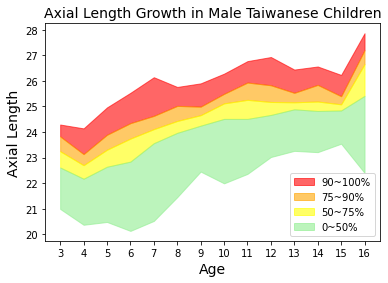

In [16]:
plot('男')

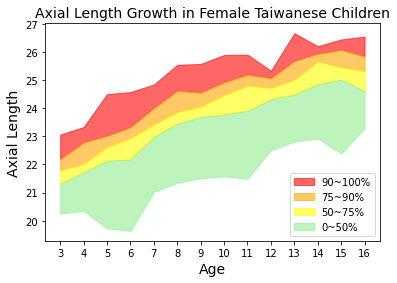

In [17]:
plot('女')